In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.10.1


In [3]:
raw_dataset = pd.read_csv('bmw_series_5_otomoto.csv',sep=';')

In [4]:
dataset  = raw_dataset.copy()
dataset.tail()
dataset = dataset.drop(["fuel_type"], axis=1)

In [5]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

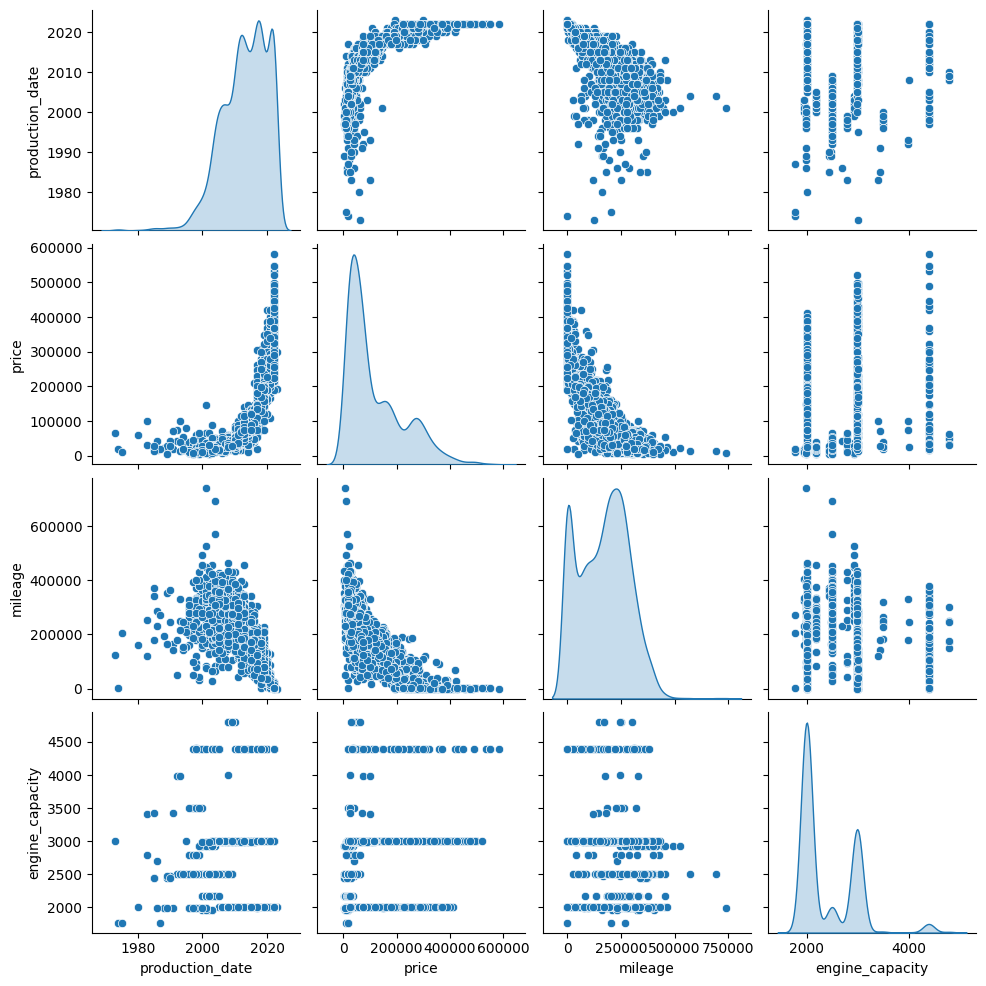

In [6]:
sns.pairplot(train_dataset[['production_date', 'price', 'mileage', 'engine_capacity']], diag_kind='kde')


In [7]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [9]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[  2013.0968 169269.92     2397.7559]]


In [10]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [PRICE]')
  plt.legend()
  plt.grid(True)

test_results = {}

##RNN REGRESSION

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dropout(rate=0.2),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [12]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                        

In [13]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, 
    epochs=1000)


C:\Users\proso\AppData\Roaming\Python\Python310\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/1000
71/71 [==============================] - 5s 11ms/step - loss: 117566.3906 - val_loss: 124204.1484
Epoch 2/1000
71/71 [==============================] - 1s 8ms/step - loss: 117303.9297 - val_loss: 123457.2266
Epoch 3/1000
71/71 [==============================] - 1s 8ms/step - loss: 115170.0000 - val_loss: 119175.5078
Epoch 4/1000
71/71 [==============================] - 1s 8ms/step - loss: 107879.7500 - val_loss: 109866.6172
Epoch 5/1000
71/71 [==============================] - 1s 8ms/step - loss: 97062.8672 - val_loss: 98170.6250
Epoch 6/1000
71/71 [==============================] - 1s 8ms/step - loss: 81287.8047 - val_loss: 76719.1797
Epoch 7/1000
71/71 [==============================] - 1s 8ms/step - loss: 56843.9062 - val_loss: 49625.5938
Epoch 8/1000
71/71 [==============================] - 1s 8ms/step - loss: 37449.4844 - val_loss: 35430.0938
Epoch 9/1000
71/71 [==============================] - 1s 8ms/step - loss: 31098.1191 - val_loss: 31333.8633
Epoch 10/1000
71/71

,Mean absolute error [PRICE]
dnn_model,15406.548828


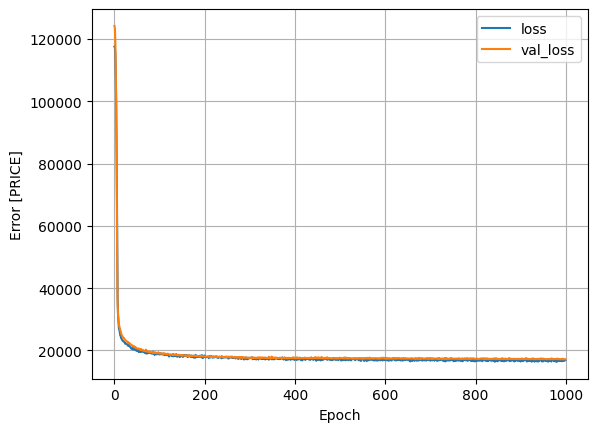

In [14]:
plot_loss(history)
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [PRICE]']).T

In [15]:
dnn_model.save('dnn_bmw5')


INFO:tensorflow:Assets written to: dnn_bmw5\assets
